### Proyecto 1- Parte final (Core)

## Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

**Instrucciones Detalladas**

**Parte 1:** Exploración y Visualización de Datos (EDA)

**Carga y Exploración Inicial de Datos:**

Cargar el dataset y revisar su estructura básica.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('../data/retail_sales_dataset.csv')

# Exploración de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [4]:
# Resumen estadístico de las columnas numéricas
print(df.describe().T)

# Resumen de las columnas categóricas
print(df.describe(include=['object']))

                 count     mean         std   min     25%    50%     75%  \
Transaction ID  1000.0  500.500  288.819436   1.0  250.75  500.5  750.25   
Age             1000.0   41.392   13.681430  18.0   29.00   42.0   53.00   
Quantity        1000.0    2.514    1.132734   1.0    1.00    3.0    4.00   
Price per Unit  1000.0  179.890  189.681356  25.0   30.00   50.0  300.00   
Total Amount    1000.0  456.000  559.997632  25.0   60.00  135.0  900.00   

                   max  
Transaction ID  1000.0  
Age               64.0  
Quantity           4.0  
Price per Unit   500.0  
Total Amount    2000.0  
              Date Customer ID  Gender Product Category
count         1000        1000    1000             1000
unique         345        1000       2                3
top     2023-05-16     CUST001  Female         Clothing
freq            11           1     510              351


In [5]:
# Revisión de valores faltantes
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Clientes únicos
print("Clientes únicos:", df['Customer ID'].nunique())

# Categorías de productos únicas
print("Categorías de productos únicas:", df['Product Category'].nunique())

# Rango de edades
print("Edad mínima:", df['Age'].min())
print("Edad máxima:", df['Age'].max())

# Distribución por género
print(df['Gender'].value_counts())


Clientes únicos: 1000
Categorías de productos únicas: 3
Edad mínima: 18
Edad máxima: 64
Gender
Female    510
Male      490
Name: count, dtype: int64


In [7]:
# Ingresos totales
total_income = df['Total Amount'].sum()
print("Ingresos totales:", total_income)

# Venta promedio por cliente
avg_sales_per_customer = df.groupby('Customer ID')['Total Amount'].mean()
print("Venta promedio por cliente:", avg_sales_per_customer.mean())

# Productos más vendidos
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("Productos más vendidos:\n", top_products)


Ingresos totales: 456000
Venta promedio por cliente: 456.0
Productos más vendidos:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


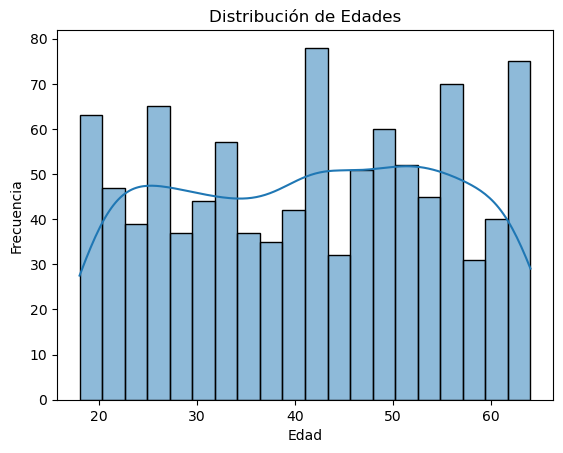

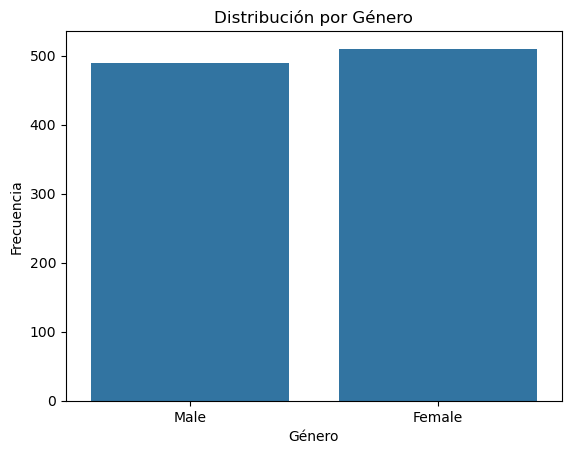

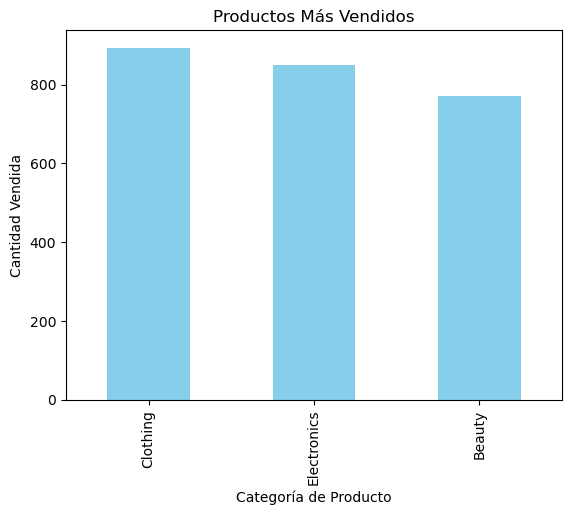

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de edades
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de género
sns.countplot(x='Gender', data=df)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Productos más vendidos
top_products.plot(kind='bar', color='skyblue')
plt.title('Productos Más Vendidos')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Vendida')
plt.show()


**Describir las variables y su distribución.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    

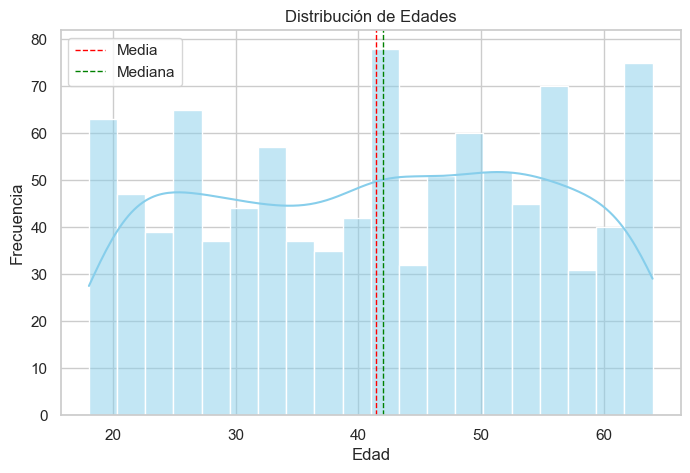

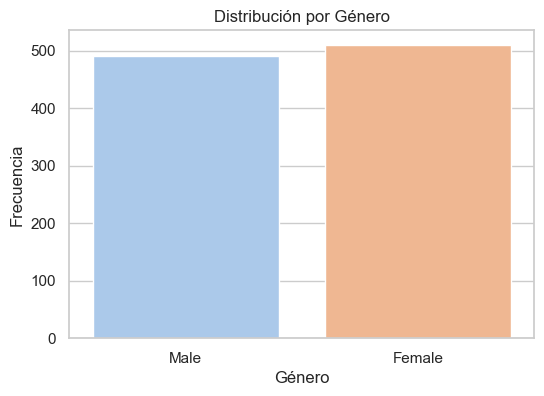

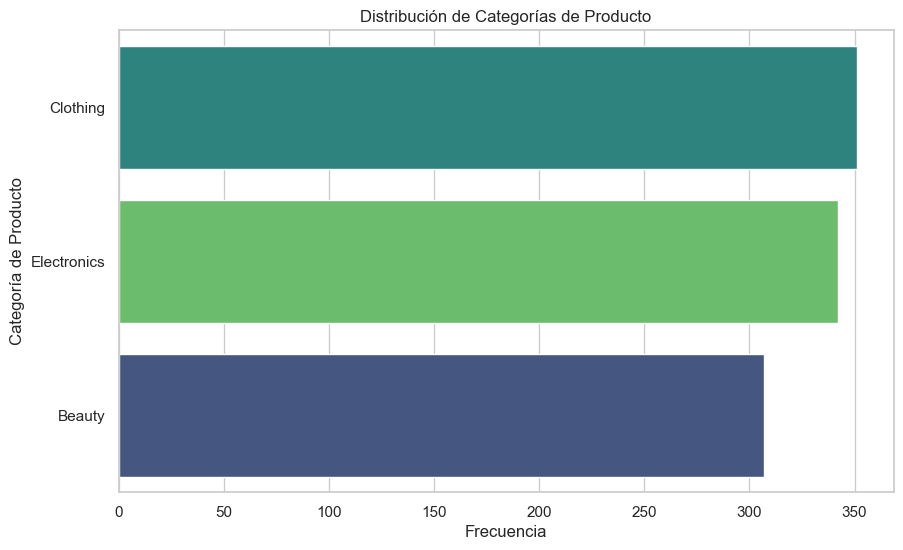

C:\Users\user\AppData\Local\Temp\ipykernel_11840\1839729374.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month Name', data=df, palette='coolwarm',


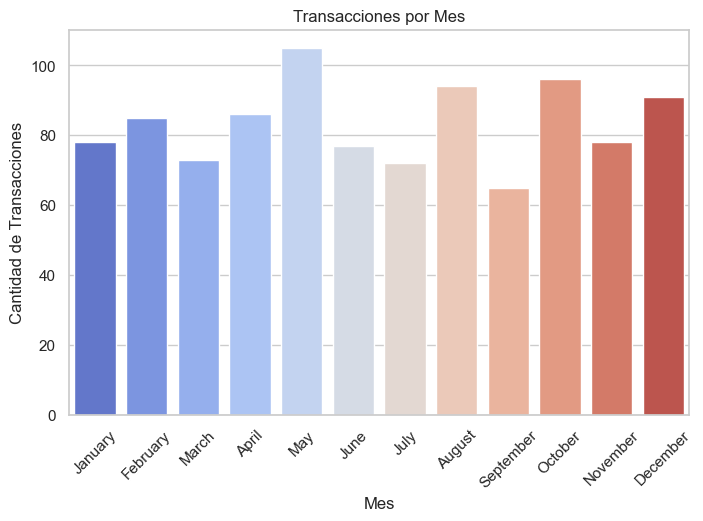

C:\Users\user\AppData\Local\Temp\ipykernel_11840\1839729374.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total Amount', data=df, palette='pastel')


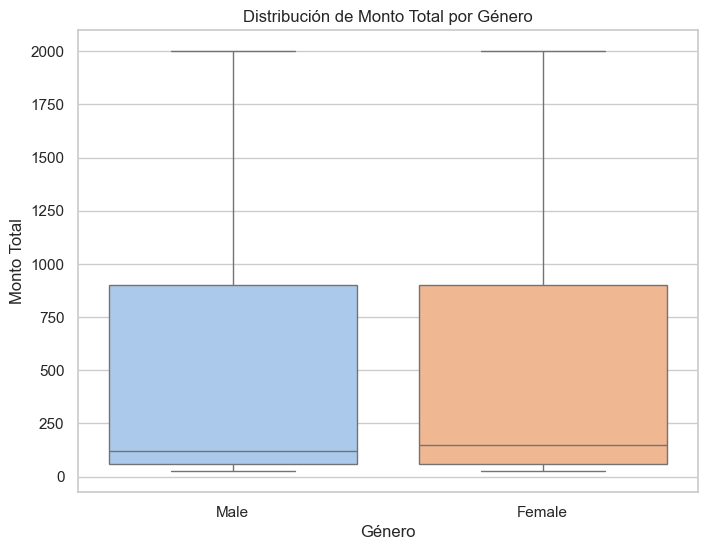

C:\Users\user\AppData\Local\Temp\ipykernel_11840\1839729374.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Product Category', y='Age', data=df, palette='muted',


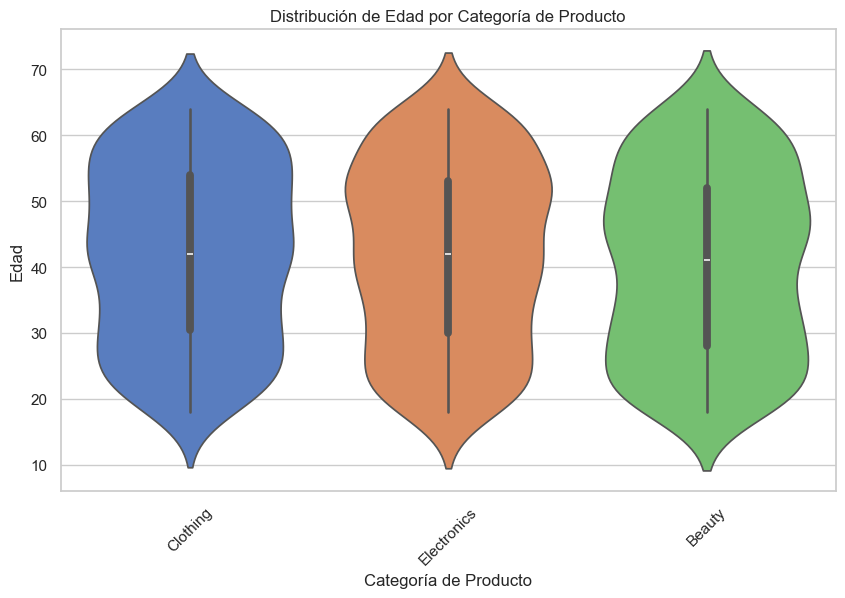

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Asegurarse de que las visualizaciones se rendericen correctamente
sns.set(style="whitegrid")

# Cargar el DataFrame (asegúrate de cargar tu archivo en df)
# df = pd.read_csv('archivo.csv')  # Carga tu archivo CSV o el DataFrame

# Descripción general del DataFrame
print(df.info())

# 1. Descripción estadística de las variables numéricas
print(df.describe())

# 2. Distribución de la Edad
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 3. Distribución de Género con hue explícito
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Gender', palette='pastel', legend=False)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# 4. Distribución de Categorías de Producto
plt.figure(figsize=(10, 6))
sns.countplot(y='Product Category', data=df, hue='Product Category', 
              palette='viridis', dodge=False, order=df['Product Category'].value_counts().index)
plt.title('Distribución de Categorías de Producto')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría de Producto')
plt.legend([], [], frameon=False)  # Opcional: oculta la leyenda si no es necesaria
plt.show()

# 5. Análisis temporal: Ventas por mes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Crear una columna con el mes
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month.map(lambda x: calendar.month_name[x])

# Ventas por mes
plt.figure(figsize=(8, 5))
sns.countplot(x='Month Name', data=df, palette='coolwarm', 
              order=[calendar.month_name[i] for i in range(1, 13)])
plt.title('Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.show()

# 6. Relación entre Género y Monto Total
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total Amount', data=df, palette='pastel')
plt.title('Distribución de Monto Total por Género')
plt.xlabel('Género')
plt.ylabel('Monto Total')
plt.show()

# 7. Relación entre Categoría de Producto y Edad
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Category', y='Age', data=df, palette='muted', 
               order=df['Product Category'].value_counts().index)
plt.title('Distribución de Edad por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Agrupar los datos por 'Product Category' y calcular estadísticas descriptivas de 'Age'
age_by_category = df.groupby('Product Category')['Age'].describe()

# Mostrar los resultados
print(age_by_category)


                  count       mean        std   min   25%   50%   75%   max
Product Category                                                           
Beauty            307.0  40.371336  13.889817  18.0  28.0  41.0  52.0  64.0
Clothing          351.0  41.948718  13.498262  18.0  30.5  42.0  54.0  64.0
Electronics       342.0  41.736842  13.669573  18.0  30.0  42.0  53.0  64.0


**Observacion:**

**Promedio:** Las tres categorías tienen promedios de gasto muy cercanos entre sí, todos alrededor de 40-42 unidades.

**Distribución:** Las distribuciones en todas las categorías son bastante parecidas, con la mayoría de los clientes gastando entre 30 y 54 unidades.

**Extremos:** Los valores más altos (hasta 64 unidades) no son tan frecuentes, pero aún son significativos.

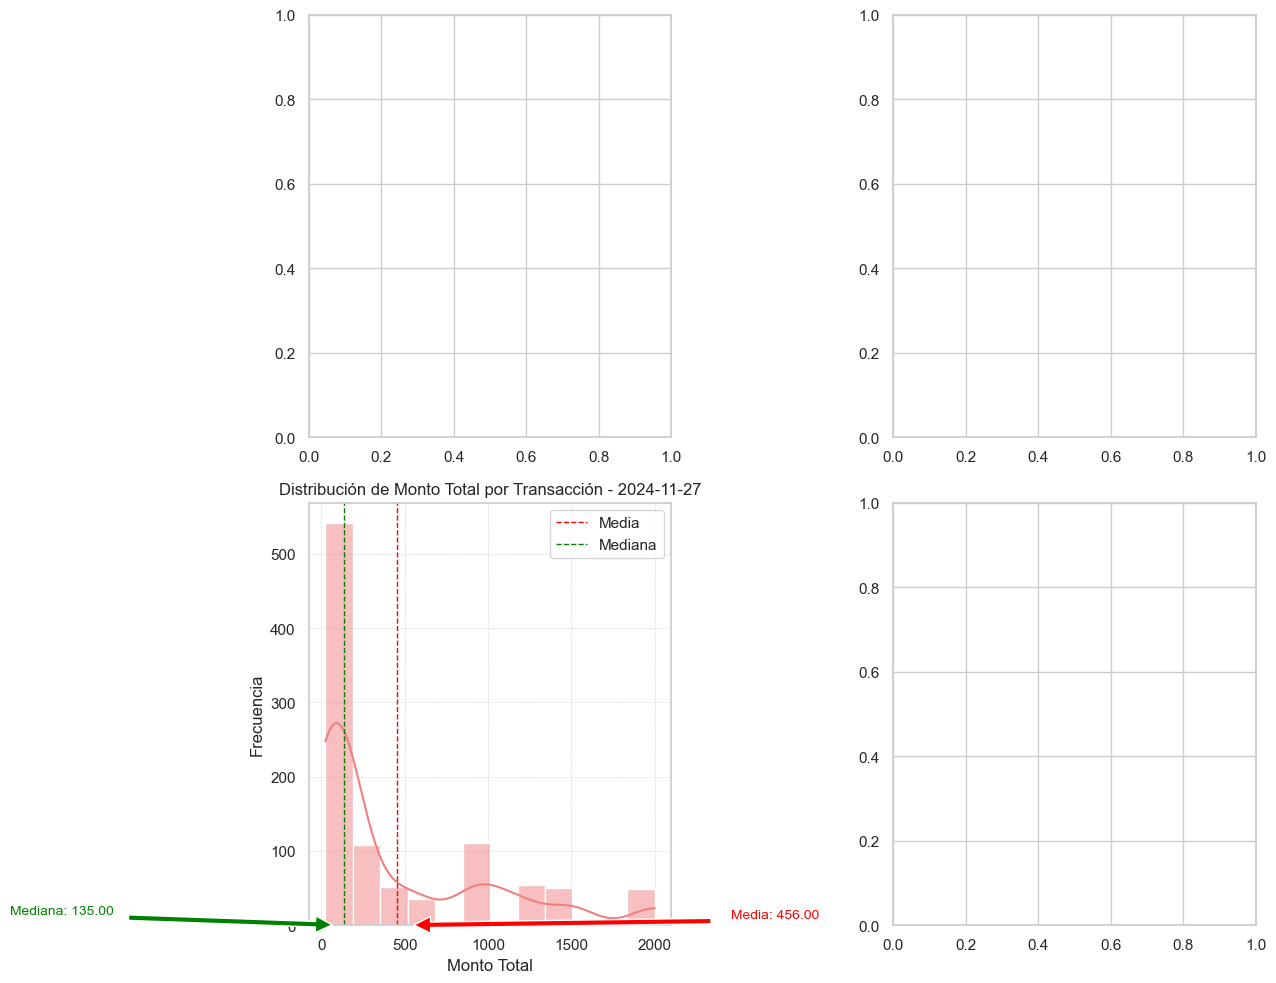

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Asegurarse de que las visualizaciones se rendericen correctamente
sns.set(style="whitegrid")


# Configuración de la figura y subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Asegúrate de tener una cuadrícula para los gráficos

# 3. Distribución de Monto Total
sns.histplot(df['Total Amount'], kde=True, color='lightcoral', ax=axes[1, 0])

# Líneas de media y mediana
axes[1, 0].axvline(df['Total Amount'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
axes[1, 0].axvline(df['Total Amount'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')

# Añadir anotaciones sobre la media y mediana
axes[1, 0].annotate(f'Media: {df["Total Amount"].mean():.2f}', 
                    xy=(df['Total Amount'].mean(), 0), 
                    xytext=(df['Total Amount'].mean() + 2000, 10), 
                    arrowprops=dict(facecolor='red', shrink=0.05), 
                    fontsize=10, color='red')

axes[1, 0].annotate(f'Mediana: {df["Total Amount"].median():.2f}', 
                    xy=(df['Total Amount'].median(), 0), 
                    xytext=(df['Total Amount'].median() - 2000, 15), 
                    arrowprops=dict(facecolor='green', shrink=0.05), 
                    fontsize=10, color='green')

# Título con fecha actual
current_date = datetime.datetime.now().strftime('%Y-%m-%d')
axes[1, 0].set_title(f'Distribución de Monto Total por Transacción - {current_date}')

# Configuración de ejes y leyenda
axes[1, 0].set_xlabel('Monto Total')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Añadir cuadrículas y más detalles visuales
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()


**Identificar y tratar valores nulos y outliers.**

In [12]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0
Month,1000,0,0.0


In [13]:
# 1. Identificar valores faltantes
faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(faltantes[faltantes > 0])

# 2. Identificar filas duplicadas
duplicados = df.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicados)

# 3. Identificar outliers usando el método del rango intercuartílico (IQR) para las columnas numéricas
# Seleccionar sólo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers (valores que están fuera de 1.5 * IQR)
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nNúmero de outliers por columna:")
print(outliers[outliers > 0])

Valores faltantes por columna:
Series([], dtype: int64)

Número de filas duplicadas: 0

Número de outliers por columna:
Series([], dtype: int64)


**Análisis de Correlación:**

Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

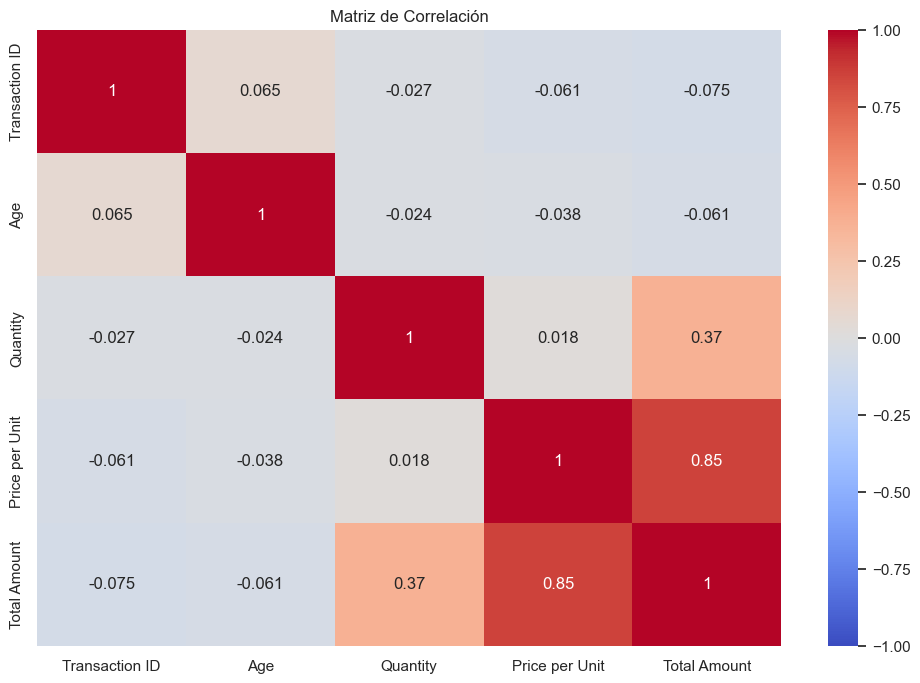

In [14]:
# Seleccionar sólo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación para las columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

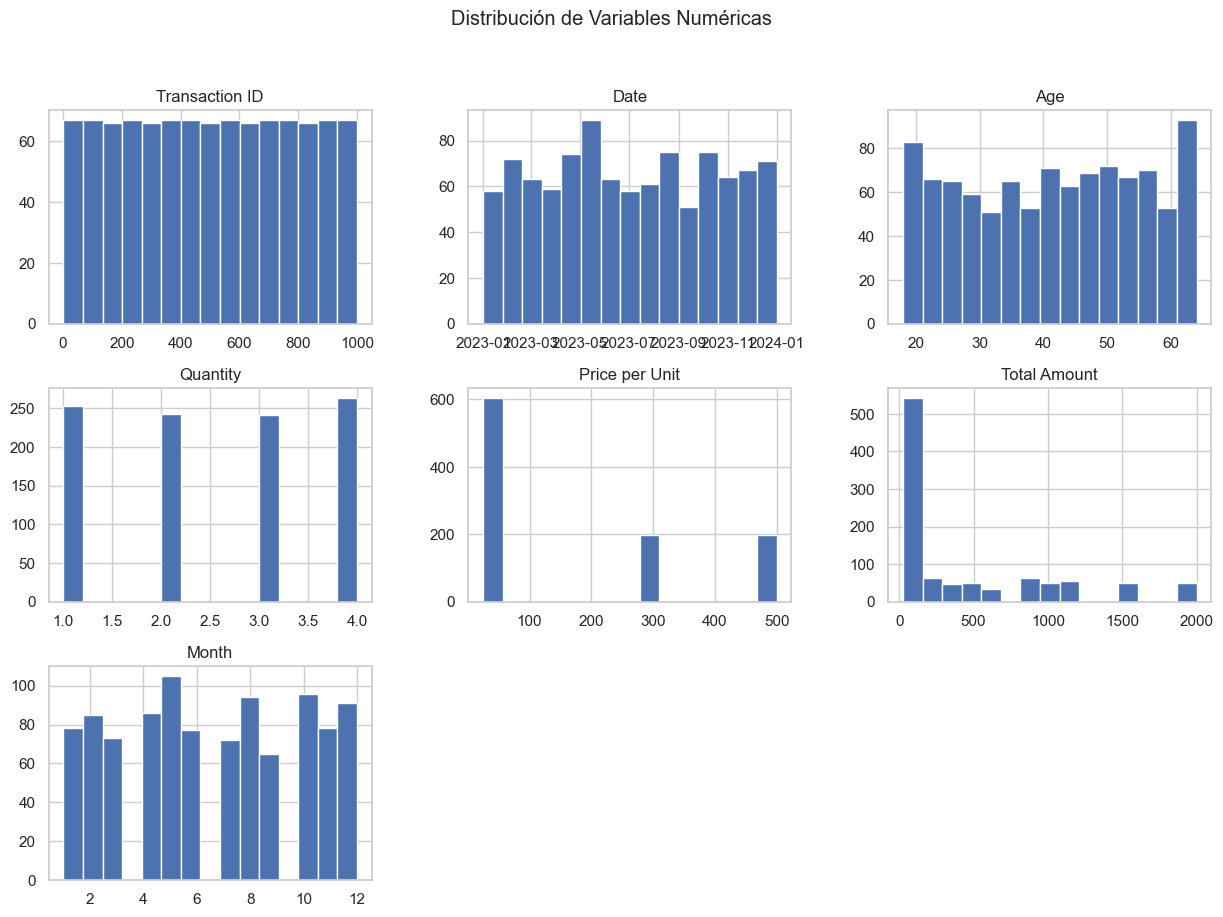

In [15]:
# Graficar histogramas para cada columna numérica
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

**Visualización de Datos:**

Crear subplots para comparar diferentes variables clave.

Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Month Name        1000 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 82.2+ KB
